# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

Many home-owners seek loans secured by the current equity in their property. These loans, known as home-equity loans, provide income to banks through the interest on the loans paid by borrowers. The ability to predict whether a borrower will default on their loan is of utmost importance in the field of finance. Predicting loan defaults accurately can help banks and other financial institutions manage their credit risks effectively, prevent losses, and ensure the stability of the financial system.When borrowers default on loans, banks lose money. 
 
When considering loan applications, banks examine various characteristics of potential borrowers. Developing and implementing classification models with high success can help to reduce any human error or bias in the loan approval process. Given a dataset of historical loan applications and their outcomes (defaulted or not), our task is to develop a predictive model that can accurately classify new loan applications as either likely to default or not. 
 
### **The objective:**

The objective of this project is to develop a machine learning model that can accurately predict loan defaults. The model should be able to identify the most important factors that contribute to loan defaults and provide insights into the risk profile of loan applicants.

### **The key questions:**

- What are the key factors that contribute to loan defaults?
- Can we develop a model that can accurately predict loan defaults?
- What is the most suitable machine learning algorithm for this problem?
- How can we evaluate the performance of the predictive model?
- How can we use the model to gain insights into the risk profile of loan applicants?

### **The problem formulation**:

Given a dataset of historical loan applications and their outcomes, our task is to develop a predictive model that can accurately classify new loan applications as either likely to default or not. The model should take into account various factors such as the loan value, amount due on existing mortgage, the current value of the property, the reason for the loan, applicant's job and years at present job, derogatory claims against the applicant, other credit lines, delinquency, recent credit inquiries and debt-to-income ratio. The model should be trained on a subset of the available data and evaluated on a test set to ensure that it generalizes well to new data. The performance of the model will be evaluated using recall and F1 score. The most important features identified by the model will be used to gain insights into the risk profile of loan applicants.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
# Libraries for data manipulation and data visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
# Read the dataset
data = pd.read_csv("hmeq.csv")

In [3]:
# Create a copy of the dataset
df = data.copy()

In [4]:
# View first 5 rows of the dataset
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# View last 5 rows of the dataset
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [6]:
# View a random sample of the dataset
df.sample(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5767,1,45000,47321.0,115000.0,DebtCon,Other,NaN,0.0,1.0,130.300000,0.0,22.0,NaN
1170,0,10000,64320.0,102375.0,DebtCon,Office,10.0,0.0,0.0,148.166667,1.0,13.0,NaN
2405,0,14500,54927.0,63177.0,DebtCon,Other,3.0,0.0,0.0,178.936168,0.0,14.0,27.062233
2978,0,16300,102826.0,114692.0,DebtCon,Other,8.0,0.0,0.0,317.507974,1.0,18.0,31.914238
3352,0,17800,137169.0,182280.0,DebtCon,Mgr,12.0,0.0,0.0,241.375307,0.0,21.0,28.846448


In [7]:
# Check the shape of the dataset
df.shape

(5960, 13)

**The dataset contains 5960 rows and 13 columns.**

In [8]:
# Check the datatypes and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**

* BAD and LOAN are integer type variables.
* MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC are all float type variables.
* Both REASON and JOB are object type variables.

* There are null values in every field with the exception of BAD and LOAN, which indicate the default status and the amount of the loan approved.

In [9]:
# Determine the percent of each field that is null
df.isnull().mean()*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**NULL Values** 
- The highest percentage of missing values are in the DEBTINC field. More than 20% of the debt-to-income ratio values are missing from the dataset.
- Almost 12% of the data is missing in the DEROG field which gives the number of major derogatory reports.
- Almost 10% of the data is missing in the DELINQ field which gives the number of delinquent credit lines.
- Almost 9% of the data is missing from the MORTDUE field which gives the amount due on the existing mortgage, the YOJ field which gives the years at present job, and the NINQ field which gives the number of recent credit inquiries.

In [10]:
df.duplicated().sum()

0

**The dataset does not contain any duplicate values.**

## Summary Statistics

In [11]:
# View summary statistics for dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


**Observations:**
- For the entire data set, the loan default rate is 19.9%.
- The mean loan amount is \\$18,608 with 75% of the loans being \$23,300 or less.
- The amount due on existing mortgage is highly variable with a mean of \\$73,761 and a max of \$399,550.
- The current value of property is also highly variable and averages \\$101,776 with a max of \$855,909.
- The years at present job ranges from 0 to 41 years with a mean of 8.9 years.
- At least 75% of the loans are to individuals with zero major derogatory reports, yet the max number of major derogatory reports is 10.
- The average age of the oldest credit line is 180 months with a max of 1168 months.
- The average number of recent credit inquiries is 21.3 with a median of 20 and a max of 71.
- The average debt-to-income ratio is 33.8% with a max of 203%. This could be an error or a very bad loan.

In [12]:
# Create a new column and assign value based on whether or not the row contains any missing values
df['full'] = np.where(df.isnull().any(axis=1),'Null','Complete')

In [13]:
df.groupby('full').count()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
full,,,,,,,,,,,,,
Complete,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364
Null,2596,2596,2078,2484,2344,2317,2081,1888,2016,2288,2086,2374,1329


In [14]:
# Compare statistics of rows containing complete data with rows containing missing values
df.groupby(['full','BAD']).mean().T

full          Complete                         Null              
BAD                  0              1             0             1
LOAN      19260.607050   18069.666667  18610.779145  16534.870641
MORTDUE   76483.152742   73864.490000  70916.074618  67773.082465
VALUE    107950.247389  102917.013333  92945.535135  96357.476161
YOJ           9.263055       7.550000      8.891408      8.201760
DEROG         0.100849       0.616667      0.228361      0.741895
DELINQ        0.209204       0.990000      0.336947      1.317013
CLAGE       183.943307     150.868206    193.348275    149.939373
NINQ          0.976501       1.660000      1.168239      1.828010
CLNO         22.092037      22.340000     19.773082     20.806220
DEBTINC      33.595725      39.647852     32.396916     38.629761

**Observations:**
- The rows containing null values have a loan default rate of **34.2%** while the rows with complete data have a loan default rate of only 8.9%.
- The rows containing null values show an average of 0.447 major derogatory reports versus those with complete data whose average is only 0.147.
- The rows containing null values show an average of 0.734 delinquent credit lines versus those with complete data whose average is only 0.279.
- The rows containing null values show an average of 1.43 recent credit inquiries versus those with complete data whose average is only 1.04.
- Other values are similar between the two groups.
- Rows containing missing values contain a much higher rate of loan defaults. This could be for several reasons including errors in ETL, errors in data collection, withholding of information by potential applicants.
- Handling of missing data must be done with care to avoid losing information contained within these rows.

## **Exploratory Data Analysis (EDA) and Visualization**

EDA (Exploratory Data Analysis) is a crucial step in any data analysis or data science project. The main importance of EDA is to gain a deeper understanding of the data and identify patterns, trends, and relationships among variables. Some of the key reasons why EDA is important are:

- Identify data quality issues: EDA helps to identify missing values, outliers, inconsistencies, and other data quality issues that can affect the accuracy of the analysis. 

- Explore variable distributions: EDA helps to visualize and understand the distributions of variables through univariate analysis, which is essential for identifying trends and patterns and detecting outliers.

- Identify relationships between variables: EDA helps to explore the relationships between different variables through bivariate and multivariate analysis. This is important for identifying patterns, trends, and correlations that can be used to build predictive models or to gain insights into the data.

- Determine appropriate data preprocessing steps: EDA helps to determine appropriate data preprocessing steps such as scaling, feature engineering, treatment of outliers, and imputation of missing values.

- Communicate findings: EDA provides a way to communicate findings to stakeholders in a clear and understandable way, through visualizations, summary statistics, and descriptive narratives.

In summary, EDA is a critical step as it helps to identify data quality issues, explore variable distributions, identify relationships between variables, determine appropriate data preprocessing steps, and communicate findings to stakeholders.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [15]:
# Make a list of all categorical variables
cat_col=list(df.select_dtypes('object').columns)

# Make a list of all numerical variables
num_col=list(df.select_dtypes(['int64','float64']).columns)

In [16]:
# Check percentages of unique values in each categorical variable
for column in cat_col:
    print(df[column].value_counts(normalize=True),'\n')

DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64 

Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64 

Complete    0.56443
Null        0.43557
Name: full, dtype: float64 



**Observations:**
- There are only two types of loans represented in the dataset: debt consolidation and home improvement.
- Roughly 69% of loans were made for debt consolidation and 31% for home improvement.
- There are six different job types represented in the dataset.
- The largest portion of applicants (42%) show a job type of "Other."
- The second largest portion of applicants (22%) show a job type of "ProfExe," followed by "Office" at 16.7% and "Mgr" at 13.5%.
- Job types of "Self" and "Sales" are only 3.4% and 1.9% of the data respectively.
- In the dataset, 43.6% of rows contain one or more variable with missing values.

### Examine categorical variables.

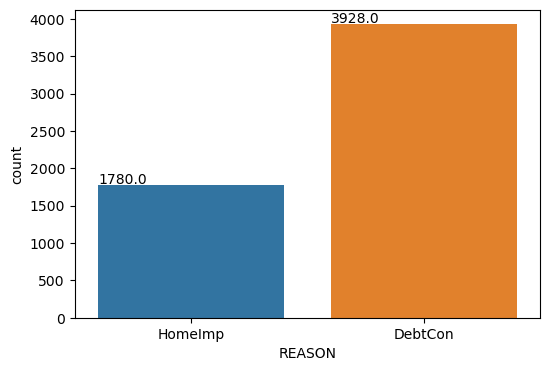

In [17]:
# View breakdown by reason
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = 'REASON', data = df)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+20))

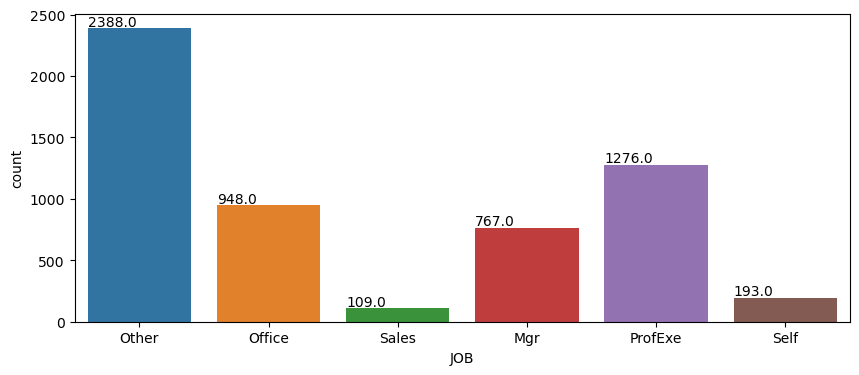

In [18]:
# View breakdown by job type
plt.figure(figsize = (10, 4))
ax = sns.countplot(x = 'JOB', data = df)

# Annotating the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+20))

**Observations:**
- Visual representations of reason for loan and job type reinforce understanding from the normalized value counts.
- Sales jobs and self-employed make up the smallest portion of the loan applicants.
- Jobs classfied as Other make up the largest portion of loan applicants, followed by Professional/Executive.

### Examine numerical variables

Histograms and boxplots can help us visualize numerical variables. These types of plots allow us to gain a better understanding of the distribution of values as well as any extreme or outlier values.

LOAN
Skew: 2.02


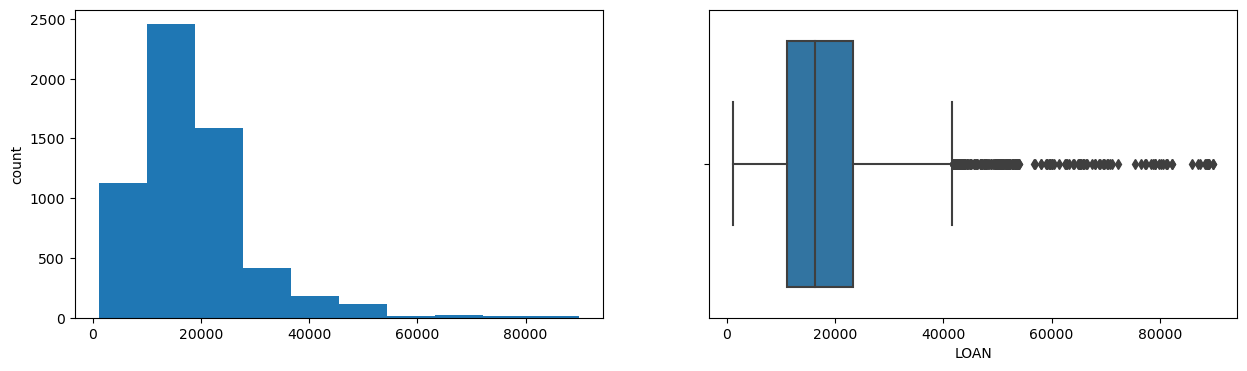

MORTDUE
Skew: 1.81


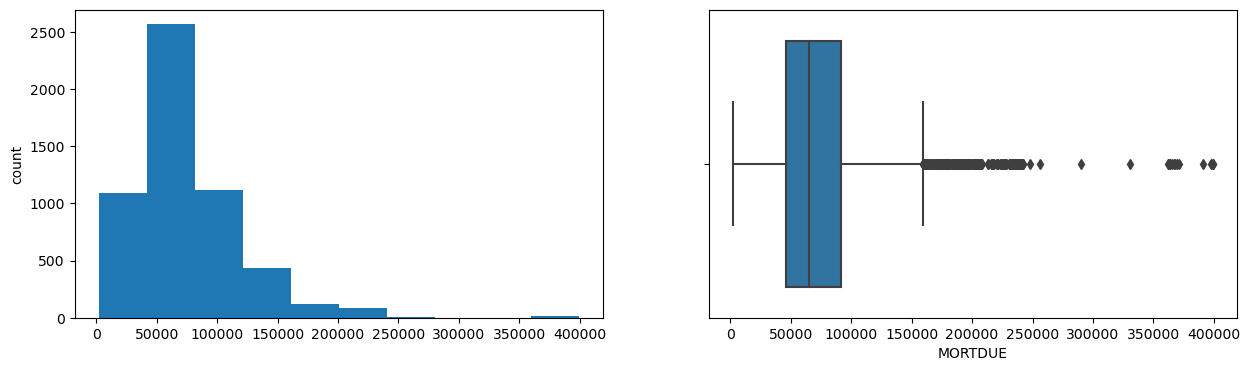

VALUE
Skew: 3.05


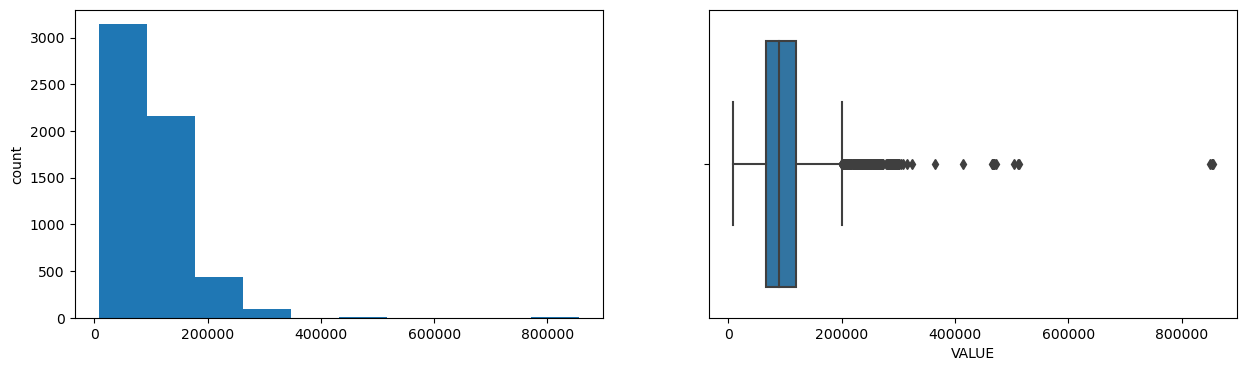

YOJ
Skew: 0.99


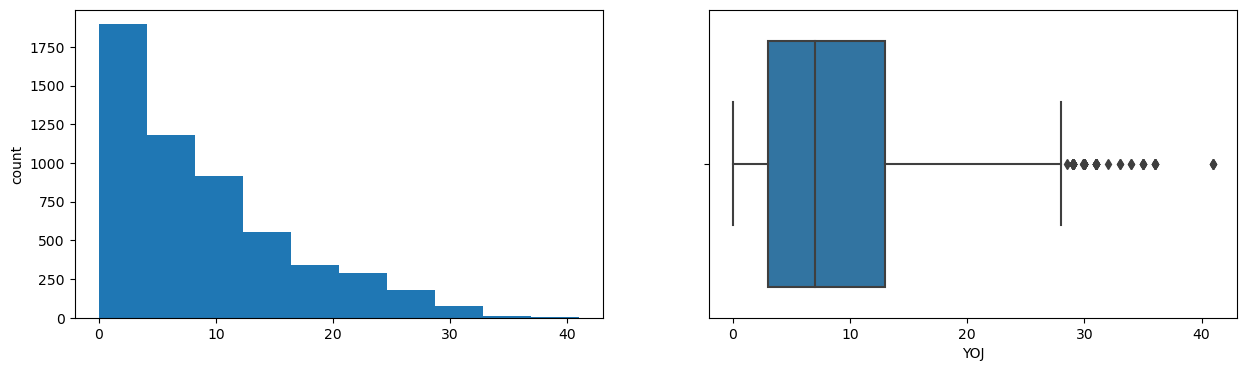

DEROG
Skew: 5.32


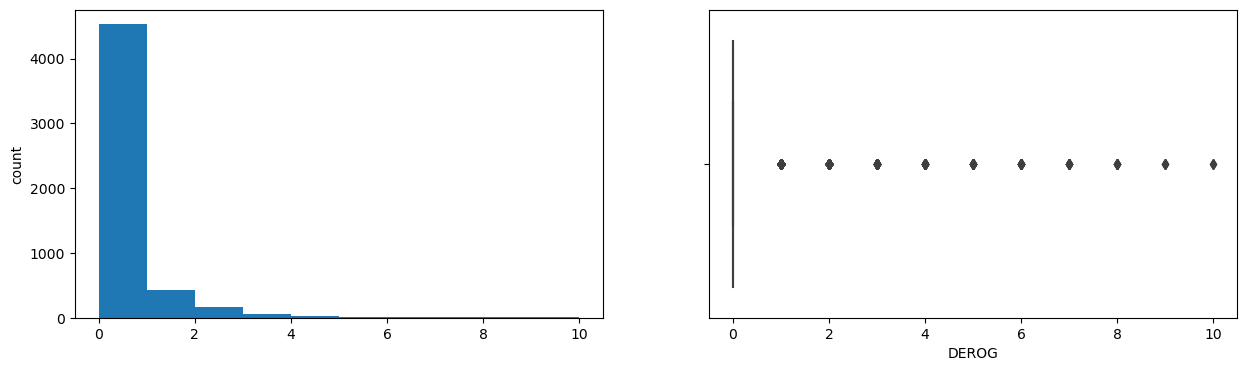

DELINQ
Skew: 4.02


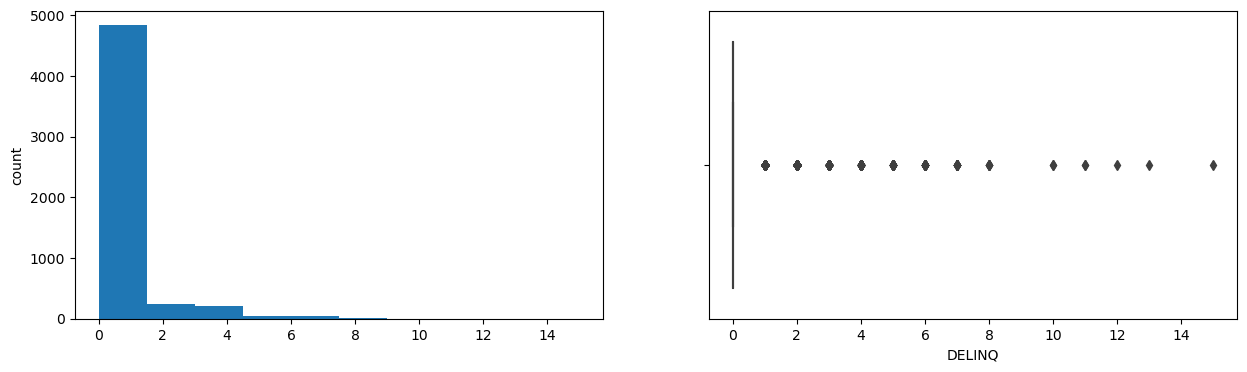

CLAGE
Skew: 1.34


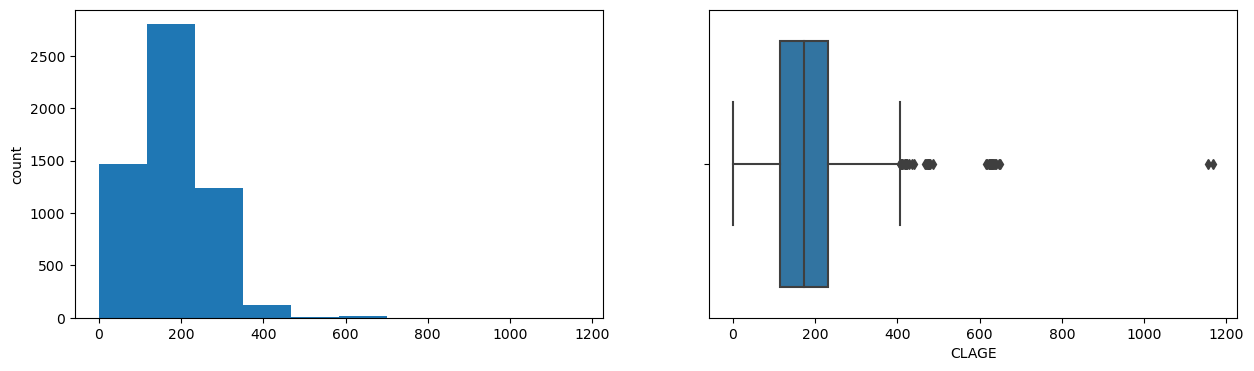

NINQ
Skew: 2.62


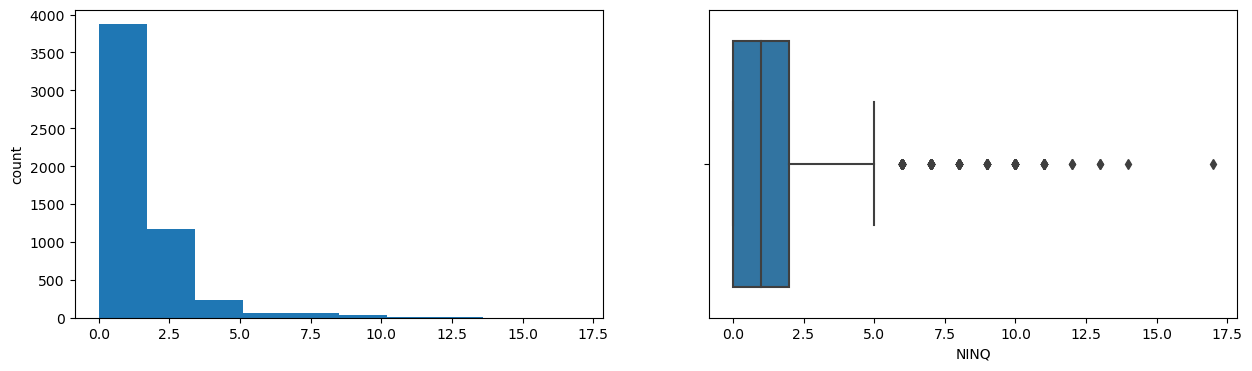

CLNO
Skew: 0.78


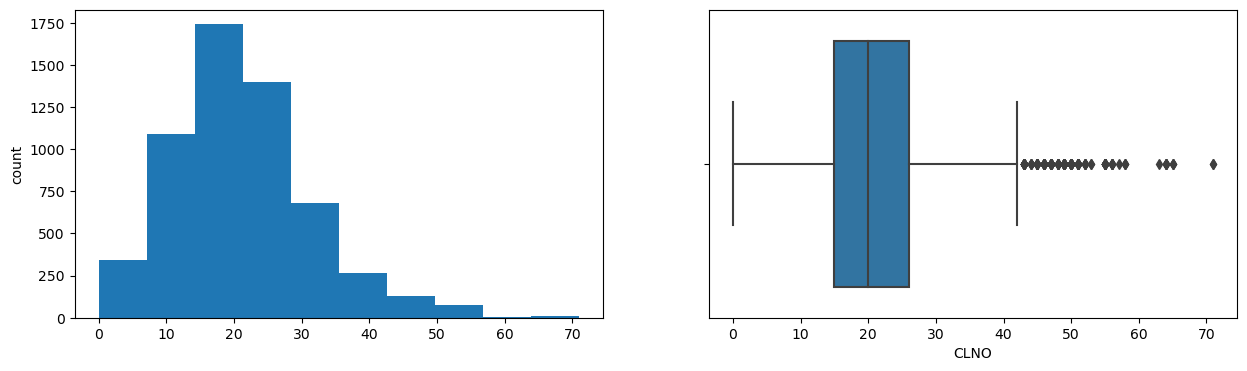

DEBTINC
Skew: 2.85


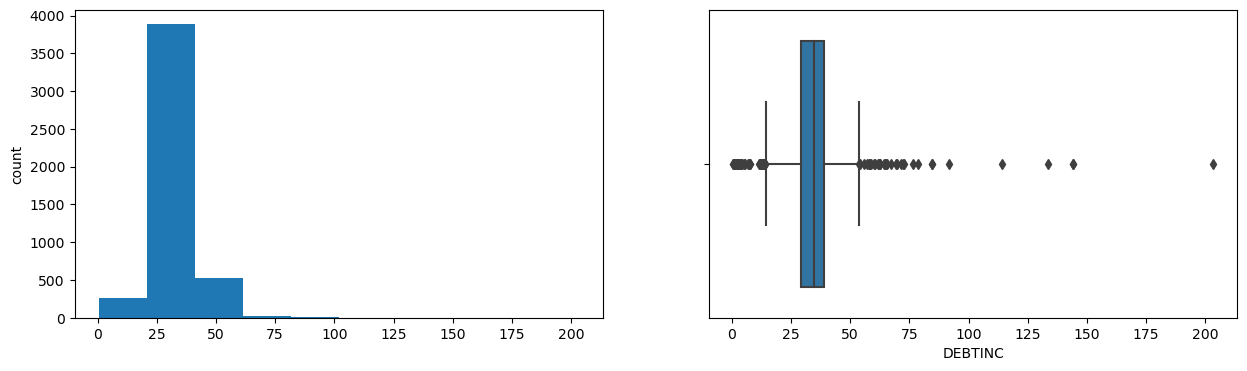

In [19]:
# Generate histograms and box plots for all numerical variables
for col in num_col[1:]:
    print(col)
    print('Skew:',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

**Observations:**
* The loan amount is skewed right, with everything above \$42,000  identified as outliers.
- The amount due on existing mortgage is skewed right, with everything above \$156,000 identified as outliers.
- The current value of property is skewed right, with everything above \\$200,000 identified as outliers and a max over \$800,000.
- Years at present job has highest peak between 0 and 5 years, with a median near 7 years. Everything above 28 years is considered an outlier.
- A large majority of loans were made to individuals with zero derogatory reports. Any loans made to those with major derogatory reports are identified as outliers.  
- Large majority of loans were made to individuals with zero delinquent credit lines. Any loans made to those with delinquent credit lines are identified as outliers.  
- The age of oldest credit lines for individuals has a somewhat normal distribution.
- Most individuals had 0-1 recent credit inquiries, while some individuals had 5 or more. Those with more than 5 recent inquiries were identified as outliers.
- The number of existing credit lines is close to normal distribution but is skewed right. Those with more than 42 existing credit lines are identified as outliers.
- The majority of individuals have a debt-to-income ratio below 40%. Those with a debt-to-income ratio greater than 53% are identified as outliers. Some data points show individuals who have a debt-to-income ratio above 100%.

### **Bivariate Analysis**

A bivariate analysis of the data allows us to visualize any relationships among pairs of variables. 

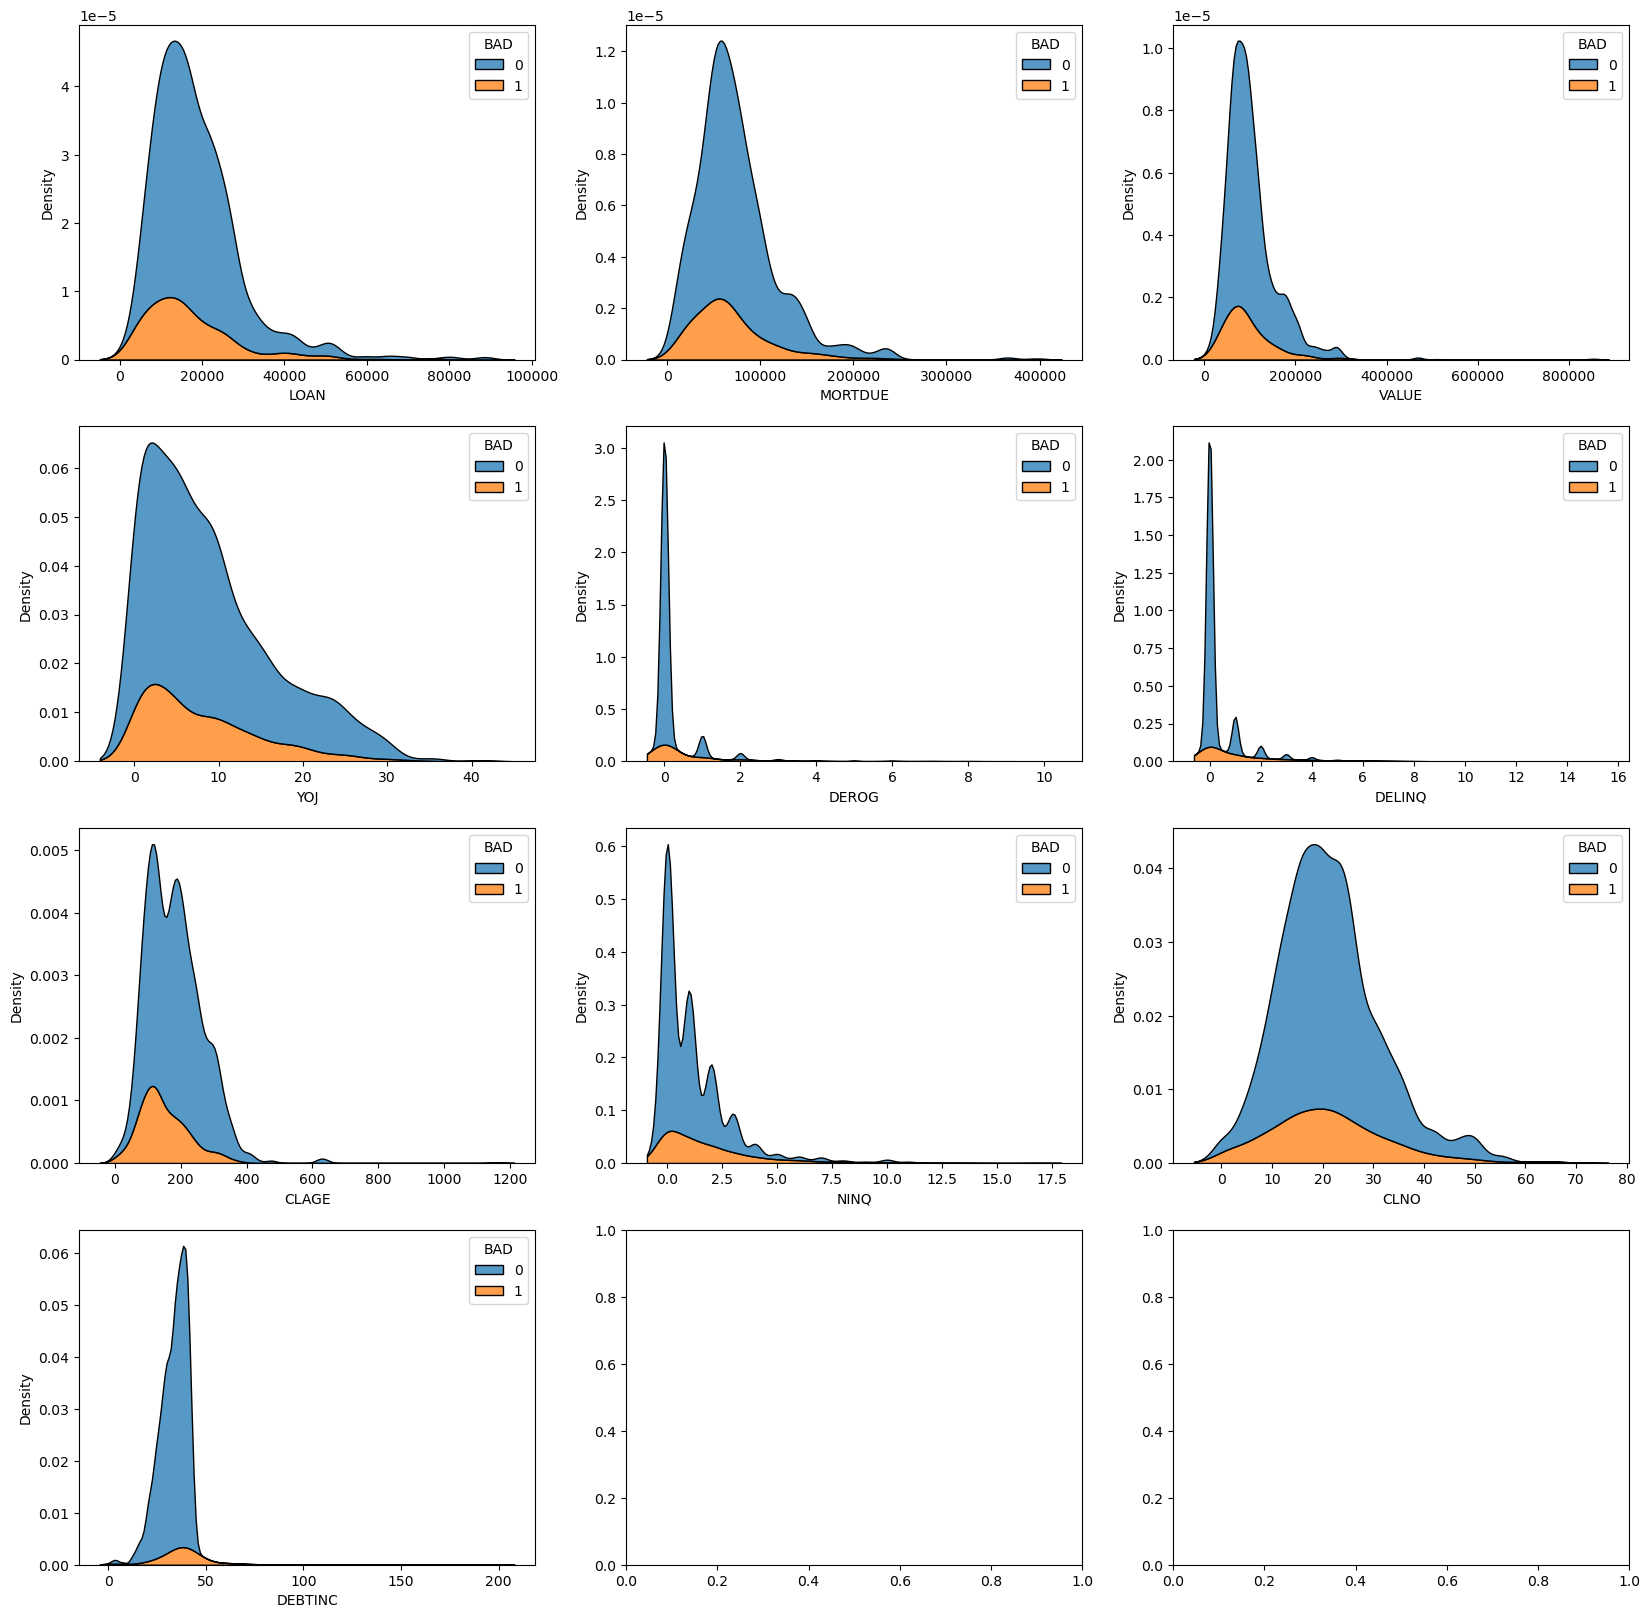

In [20]:
# Looking at distribution for each numerical variable by loan default indicator.
# Use kdeplot to get a less cluttered view and to compare the distribution by loan default
fig, axes = plt.subplots(4, 3, figsize = (20,20))
r=0
c=0
for index,var in enumerate(num_col[1:]):
    if index<3: r,c=0,index
    elif index<6: r,c=1,index-3
    elif index<9: r,c=2,index-6
    else: r,c=3,index-9
  
    sns.kdeplot(df[var],hue=df['BAD'],fill=True,multiple='stack',ax=axes[r,c])

**Observations:**
- On visual inspection, the kde distributions of loans that default and loans that do not default look similar.
- It is difficult to determine from these plots what is happening in the tails.
- The distributions for debt-to-income ratio look a bit different with the defaulting loans appearing to extend into higher values of debt-to-income ratio while those that do not default drop off sharply.

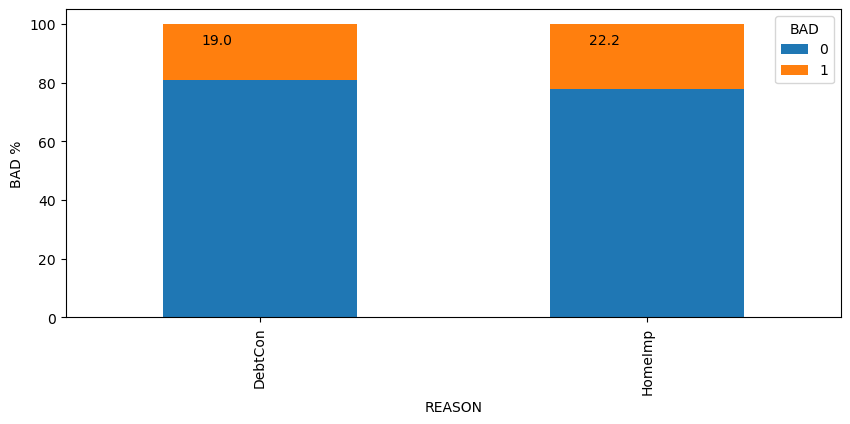

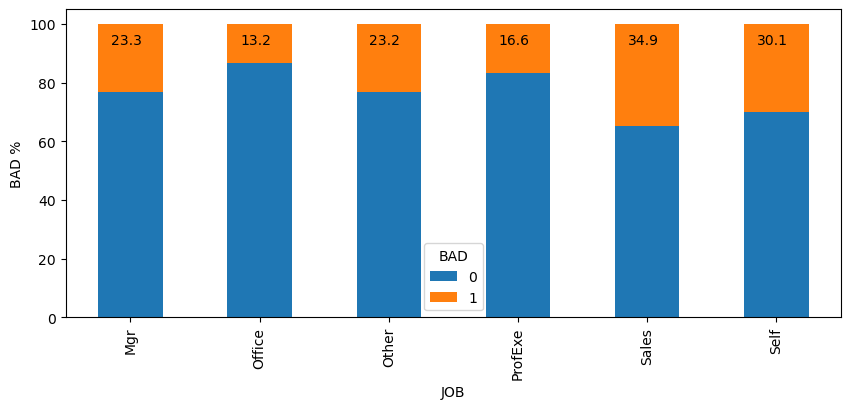

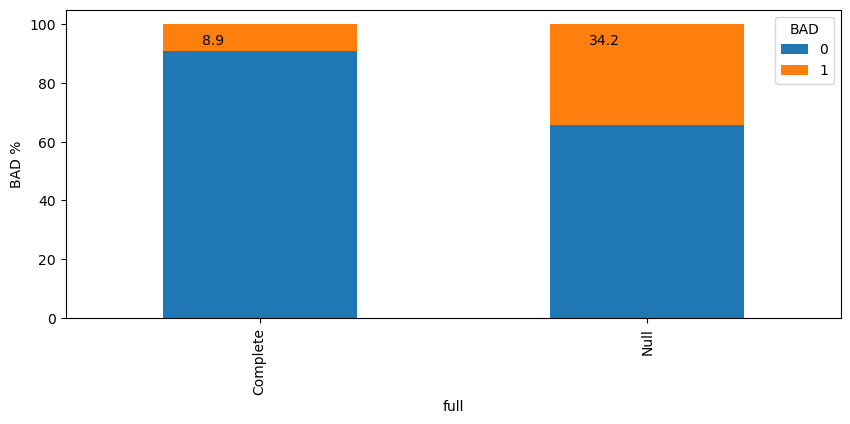

In [21]:
#Examine relationship between categorical variables and loan default indicator (BAD)
for col in cat_col:
    ax=(pd.crosstab(df[col], df['BAD'], normalize = 'index')*100).plot(kind = 'bar', figsize = (10, 4), stacked = True)
    plt.ylabel('BAD %')
    for p in ax.patches:
        if p.get_height()<50:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, 93))

**Observations:**
- The loan default rate is only slightly different between debt consolidation loans (19%) and home improvement loans (22.2%).
- The loan default rate varies by job type, with the highest default rate being for those identified as sales (34.9%) followed by those identified as self employed (30.1%).
- The lowest loan default rate was for those who had the job type Office (13.2%).
- As previously noted, the rows containing missing data have a significantly higher default rate (34.2% default) than those with complete data (8.9% default).

In [22]:
# View means for all numerical variables by loan default indictor
df.groupby(['BAD'])[num_col].mean()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,,
0,0.0,19028.107315,74829.249055,102595.921018,9.154941,0.134217,0.245133,187.002355,1.032749,21.317036,33.253129
1,1.0,16922.119428,69460.452973,98172.846227,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,39.387645


**Observations:**
The largest differences in means between those who defaulted on their loans and those who did not are the following: 
- Number of major derogatory reports, 0.71 for defaults versus 0.13 for no-default.
- Number of delinquent credit lines, 1.23 for defaults versus 0.25 for no-default.
- Number of recent credit inquiries, 1.78 for defaults versus 1.03 for no-default. 
- Debt-to-income ratio, 39.4% for defaults versus 33.3% for no-default.

In general, people who defaulted on their home equity loans had almost 450% more major derogatory reports, had 400% more delinquent credit lines, 73% more recent credit inquiries and had debt-to-income ratios that were 6% higher than those who did not default.

#### View boxplots segmented by loan default status

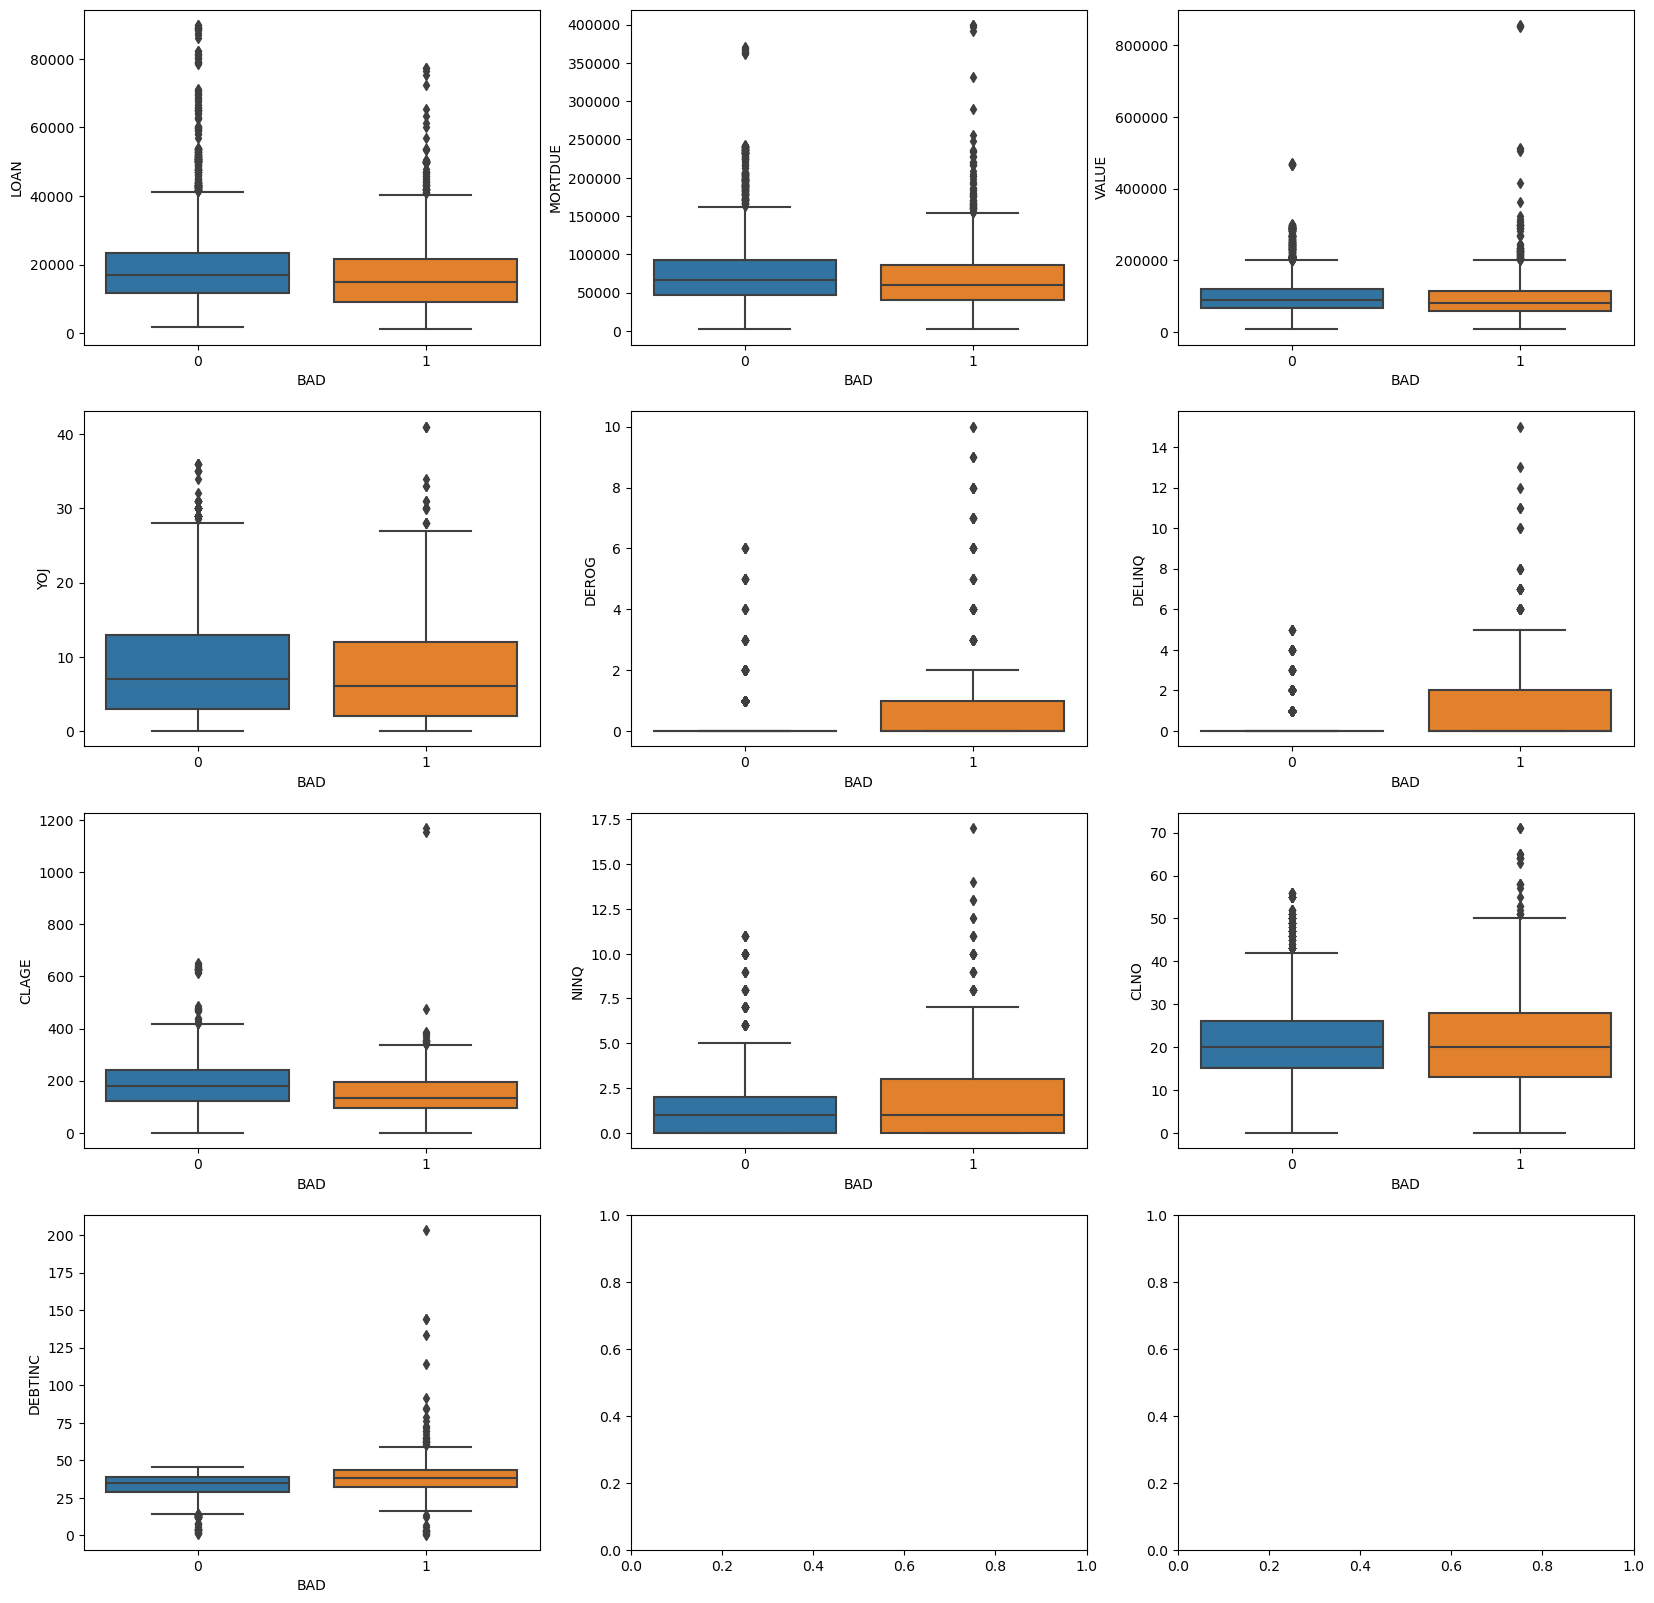

In [23]:
# Create side-by-side box plots for each numeric variable in the dataset comparing by loan default status

fig, axes = plt.subplots(4, 3, figsize = (20, 20))
r=0      # create variable to index row for subplot
c=0      # create variable to index column for subplot

for index,col in enumerate(num_col[1:]):  # loop through all numeric variables
    if index<3: r,c=0,index
    elif index<6: r,c=1,index-3
    elif index<9: r,c=2,index-6
    else: r,c=3,index-9
    sns.boxplot(x = 'BAD', y = col, data = df,ax=axes[r,c]);  # plot each subplot in designated location

**Observations:**
- When comparing those who defaulted to those who did not, the distributions of amount of loan, amount due on existing mortgage, current value of property and years on job look very similar.
- The greatest differences in distributions are with the number of major derogatory reports and the number of delinquent credit lines. 
- For loans that did not default, borrowers had 0 derogatory reports and 0 delinquent credit lines, with the exceptions of those identified as outliers. 
- For loans that did default, the upper whisker was at 2 major derogatory reports, with outliers up to 10 major derogatory reports.
- For loans that did default, the upper whisker was at 5 delinquent credit lines, with outliers up to 15.
- Both loan types had a median number of recent credit inquiries of 1, however the upper 50% of data for loans that defaulted was much more variable with outliers reaching up to 17 recent inquiries.
- Both loan types had similar median number of existing credit lines, however there is more variability for those who defaulted.
- The debt-to-income ratio for those who defaulted is slightly higher than those who did not. Loans that defaulted have outliers reaching up to 200% debt-to-income ratio.
- People who defaulted on their loans had major derogatory reports, had delinquent credit lines, had more recent credit inquiries and had higher debt-to-income ratios.

### **Multivariate Analysis**

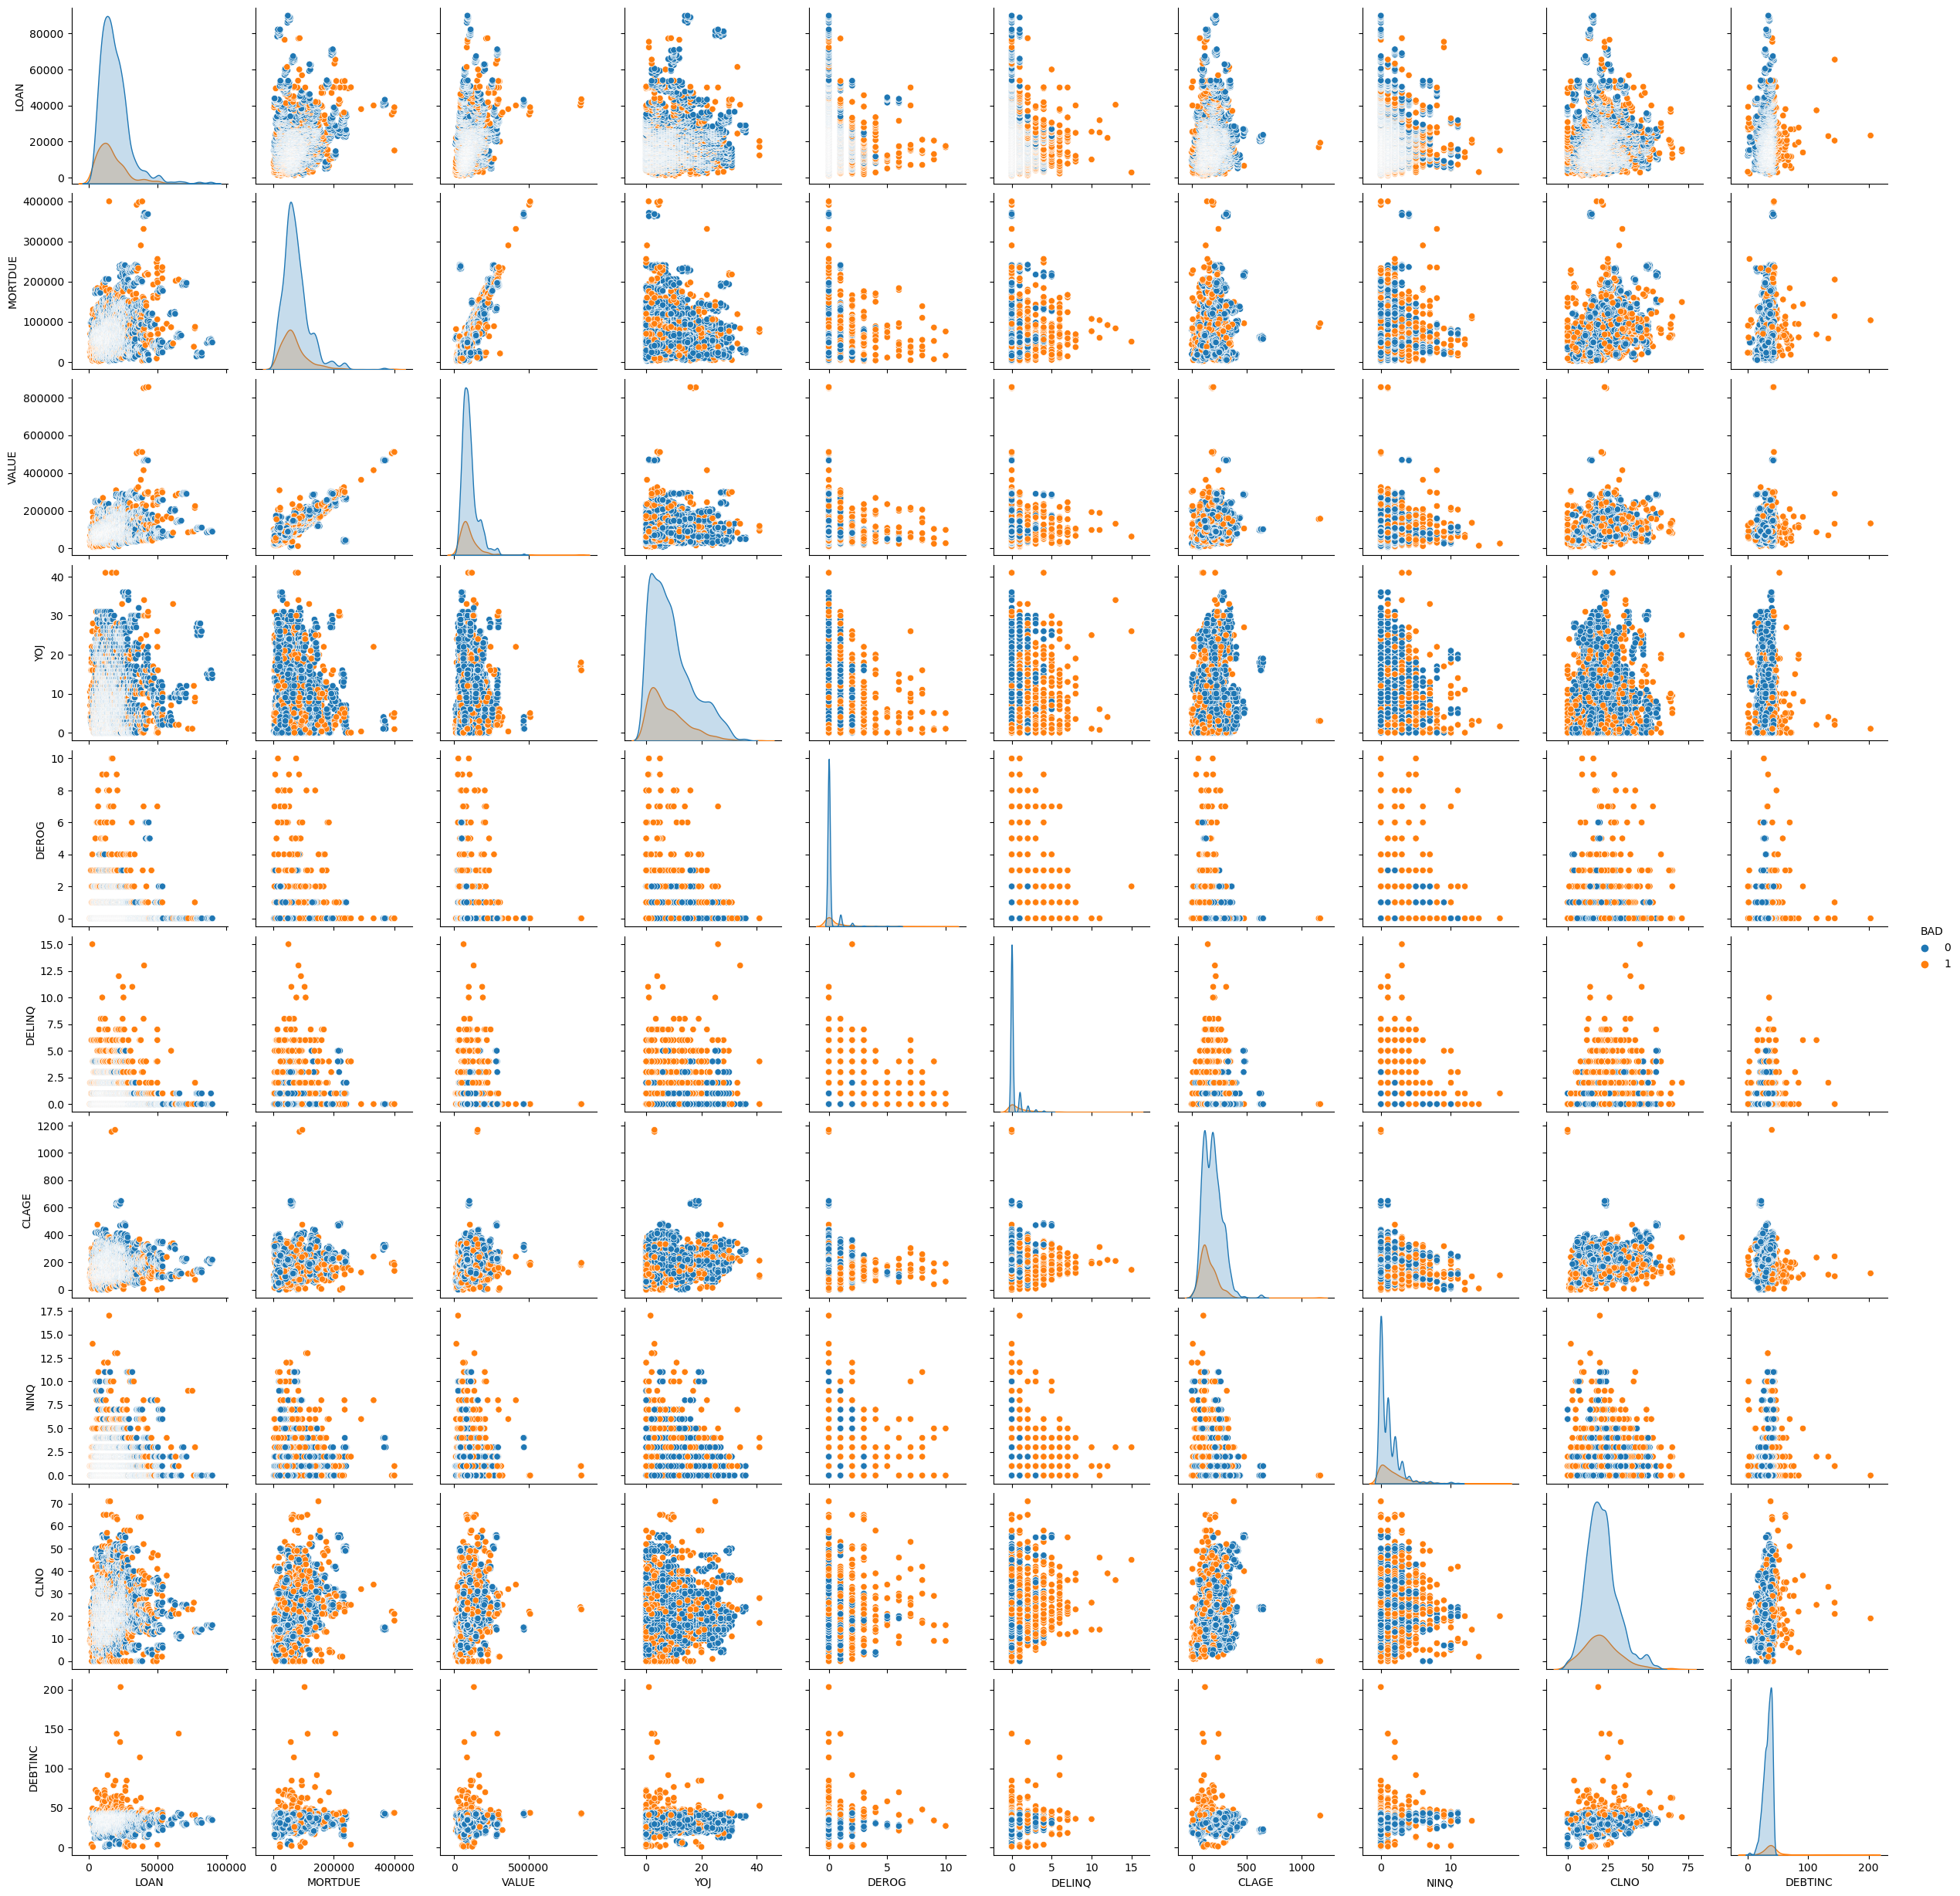

In [24]:
# Generate scatter plots for all numeric variables.
sns.pairplot(df,vars=num_col[1:],corner=False,hue='BAD')

**Observations:**
- For many combinations of the numeric variables, the two colors are well mixed, indicating that the data is distributed similarly across those two variables regardless of loan default status. 
- The amount due on mortgage and current value of property show a positive linear association as expected.
- For DEROG, DELINQ, DEBTINC, the scatter plots clearly show loans that defaulted typically extend into higher values than those that did not default.


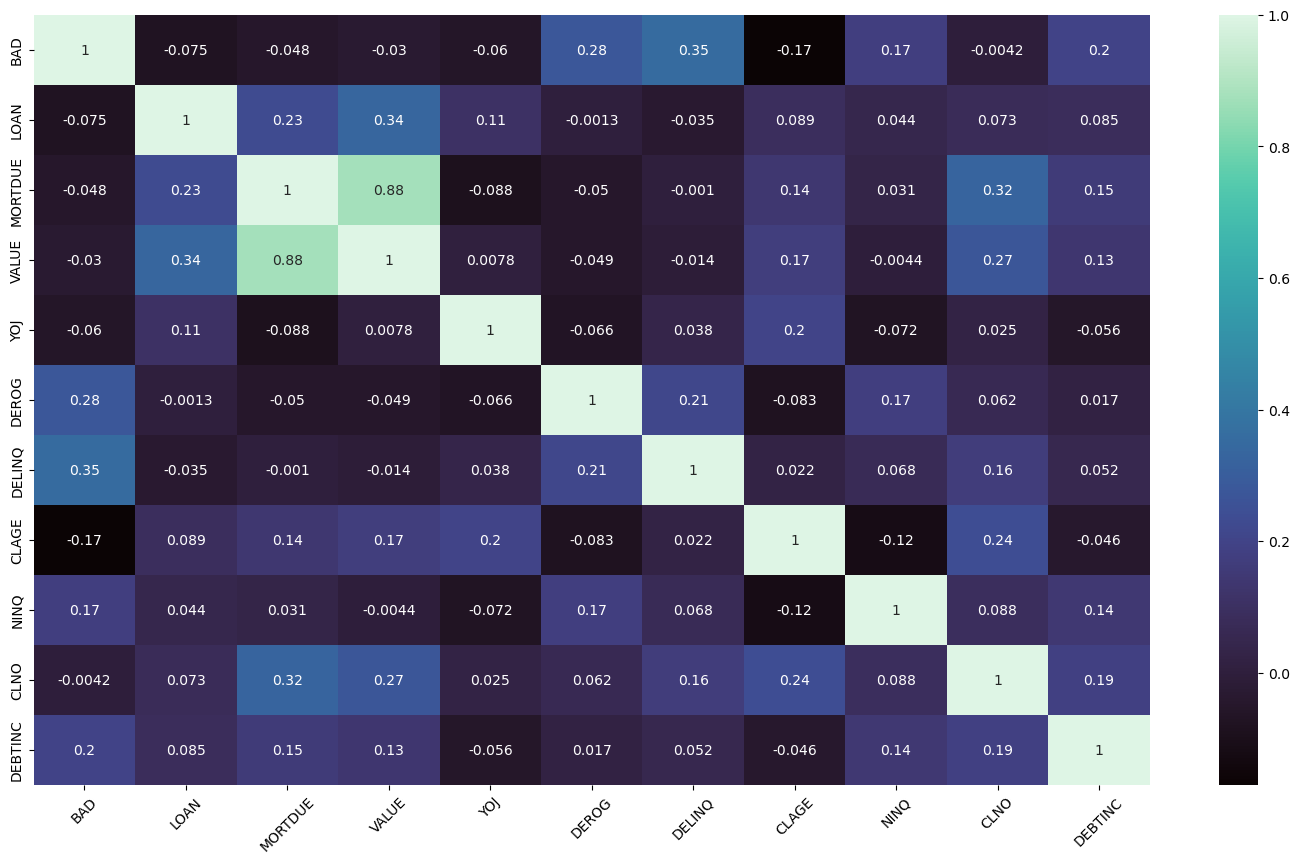

In [25]:
# Examine correlation of numeric variables by heatmap
fig = plt.figure(figsize = (18, 10))

sns.heatmap(data.corr(), annot = True,cmap='mako');

plt.xticks(rotation = 45);

**Observations:**
- The heatmap shows the strongest correlation (0.88) exists between MORTDUE and VALUE, the amount due on the existing mortgage and the current value of the property. This makes sense as mortgage amounts are typically based on property value.
- There are several much weaker correlations that are visible in the heatmap.

> - Correlation between BAD and DELINQ is 0.35: the loan default indicator and the number of delinquent credit lines for the individual.
> - Correlation between VALUE and LOAN is 0.34: the current value of the property and the number of existing credit lines.
> - Correlation between MORTDUE and CLNO is 0.32: the amount due on existing mortgage and the number of existing credit lines.
> - Correlation between BAD and DEROG is 0.28: the loan default indicator and the number of major derogatory reports for the individual.
> - Correlation between VALUE and CLNO is 0.27: the current value of the property and the number of existing credit lines.
> - Correlation between MORTDUE and LOAN is 0.23: the amount due on existing mortgage and the amount of the loan.

## Treating Outliers

While there are outliers in each numerical variable, we will leave these in the dataset as they contain important information regarding characteristics of the loans.

## Treating Missing Values

In [26]:
# Make a copy of the dataset before imputing values
dfimp=df.copy()

In [27]:
# Replace null values for numerical variables with the median for that column 
# based on the value of BAD, loan default status

for col in dfimp[['LOAN','MORTDUE','VALUE','YOJ','CLAGE','NINQ','CLNO','DEBTINC','DEROG','DELINQ']].columns:
    for bad_value, bad_group in dfimp.groupby('BAD'):  # for each level of BAD
        group_median = bad_group[col].median()    # calculate the median for the current column
        # for each row in this BAD group, if value is null, replace with median for this BAD group
        dfimp.loc[(dfimp['BAD']==bad_value) & (dfimp[col].isnull()), col] = group_median 
       

In [28]:
# Replace missing values in categorical fields with the mode
dfimp['JOB'] = dfimp['JOB'].fillna(dfimp['JOB'].mode()[0])
dfimp['REASON'] = dfimp['REASON'].fillna(dfimp['REASON'].mode()[0])

In [29]:
# Confirm that there are no longer any missing values in the dataset
dfimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
 13  full     5960 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 652.0+ KB


## **Important Insights from EDA**

**Description of Data:**
- There are 5960 observations and 13 columns in the data.
- Each field contains null values with the exception of BAD and LOAN, which indicate the default status and the amount of the loan approved.
- There are 11 numerical variables, one of which is BAD, a binary variable indicating loan default status.
- There are 2 categorical variables indicating the reason for the loan and the job type of the borrower.

**Data Cleaning:**
- Since the features have different scales, we will need to scale the data. This is most important with running a logistic regression model.
- I will use the Standard Scaler method which scales the data using the Z-score.
- Outliers will remain in the data and be included in training models.
- Missing values for categorical variables were replaced with the mode. For REASON, missing values were replaced with debt consolidation and for JOB, other.
- For numerical variables, missing values were replaced with the median value for that variable dependent on the loan default status, BAD. In other words, missing values in observations with a BAD of 1 were replaced by the median value for that column within the subgroup where BAD equals 1. 

**Observations from EDA:**
- Roughly 20% of borrowers in the dataset defaulted on their home equity loan resulting in losses for the bank.
- Seventy-five percent of the loans are less than \\$23,350 with an average loan amount of \\$18,608, and a maximum of \\$89,900.
- Seventy-five percent of borrowers owe less than \\$91,500 on their existing mortgage, with an average amount due of \\$73,761, and a range from \\$2,063 to \\$399.550. 
- The average value of the existing property is \\$101,776, with a range from \\$8,000 to \\$855,909. 75% of the properties have a value below \\$119,900.
- Most borrowers have been at their present job for 13 years or less, with the top 25 percent of borrowers in their job from 13 to 41 years.
- The average number of major derogatory reports is 0.25, with more than 75% of borrowers having 0 and others having up to 10 reports.
- The average number of delinquent credit lines is 0.45, with more than 75% of borrowers having 0 and others having up to 15 delinquent credit lines.
- The average age of the oldest credit line in months is 180 months (15 years), with a range from 0 to 1168 months.
- The average number of recent credit inquiries is 1.19 with a median of 1 and a maximum of 17 recent inquiries.
- The average number of existing credit lines is 21.3 with a range from 0 to 71. The exact meaning of this variable is a little unclear. It seems unlikely that individuals would have an average as high as 21 credit lines.
- The average debt-to-income ratio for borrowers is 33.8% with a minimum of 0.52% and a maximum of 203.3%. Seventy-five percent of borrowerss have a debt to income ratio below 39.1%.
- Borrowers who did not default on their loans typically had 0 derogatory reports and 0 delinquent credit lines, with the exceptions of those identified as outliers.
- The majority of borrowers who did default on their loans had 2 or fewer derogatory reports, with outliers up to 10 major derogatory reports.
- The majority of borrowers who did default on their loans had 5 or fewer delinquent credit lines, with outliers up to 15.
- Both loan types had a median number of recent credit inquiries of 1, however the upper 50% of data for loans that defaulted was much more variable with outliers reaching up to 17 recent inquiries.
- Both loan types had similar median number of existing credit lines, however there is more variability for those who defaulted.
- The debt-to-income ratio for those who defaulted is slightly higher than those who did not. Loans that defaulted have outliers reaching up to 200% debt-to-income ratio.
- People who defaulted on their loans had major derogatory reports, had delinquent credit lines, had more recent credit inquiries and had higher debt-to-income ratios.